<p style="background-color:#B5844C;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px;">Spaceship Titanic 🚀</p>

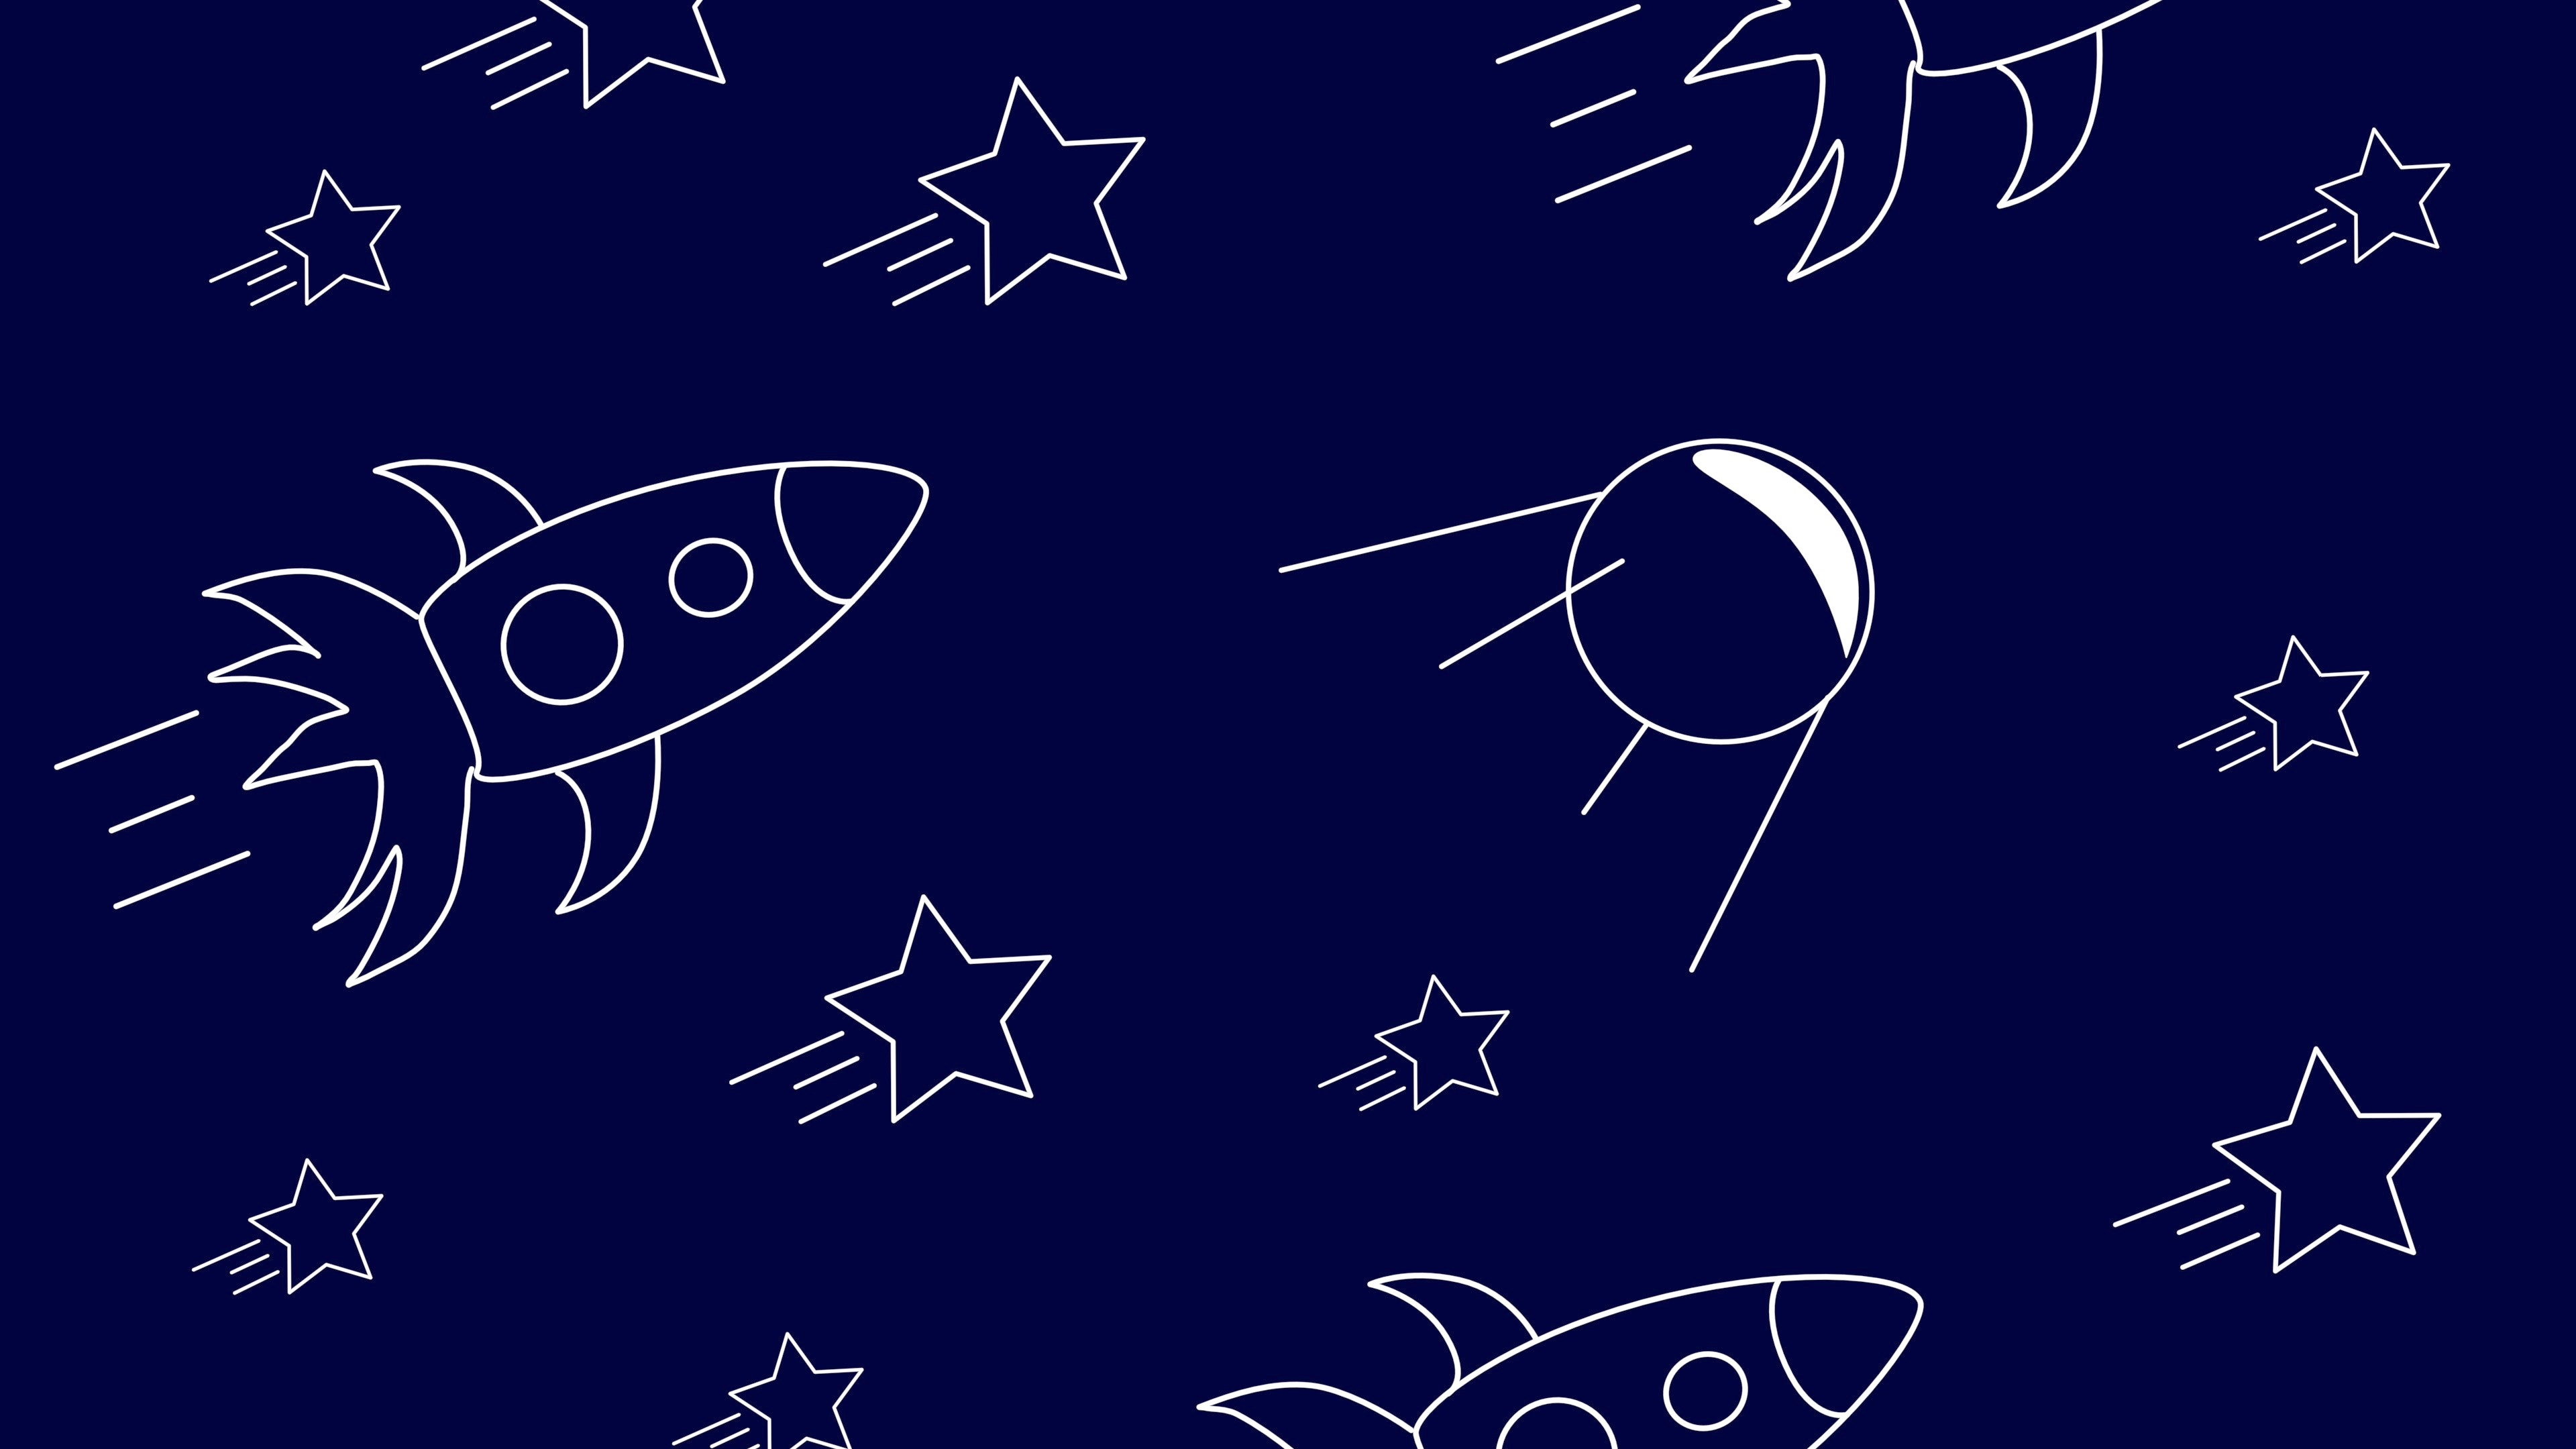

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Importing</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
import lightgbm as lgbm

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Load Trainning DataSet</p>

In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_data.shape

(8693, 14)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Explore a Pattern</p>

In [6]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

numericals_cols = ['Age','RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']

descriptive_cols = ['PassengerId','Cabin', 'Name']

print(f'Total number of target features: {1}')
print(f'Total number of categorical features: {len(categorical_cols)}')
print(f'Total number of numericals features: {len(numericals_cols)}')
print(f'Total number of descriptive features: {len(descriptive_cols)}')

Total number of target features: 1
Total number of categorical features: 4
Total number of numericals features: 6
Total number of descriptive features: 3


<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Visualizing Target</p>

In [7]:
sns.countplot(x = 'Transported',hue = "Truth", data = train_data)

ValueError: Could not interpret input 'Truth'

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Visualizing categorial features</p>

In [ ]:
plt.figure(figsize = (15, 10))
for i in enumerate(categorical_cols):
    plt.subplot(2, 2,i[0]+1)
    sns.countplot(i[1], data = train_data)

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Visualizing categorial features based on target</p>

In [ ]:
plt.figure(figsize = (15, 10))
for i in enumerate(categorical_cols):
    plt.subplot(2, 2,i[0]+1)
    sns.countplot(i[1], hue = 'Transported', data = train_data)

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Visualizing numericals features</p>

In [ ]:
for i, l in enumerate(numericals_cols):
    if i % 2 == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, i % 2 + 1)
    plt.hist(train_data[l], bins=100)
    plt.xlabel(l)
plt.show()

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Visualizing numericals features based on target</p>

In [ ]:
plt.figure(figsize = (16, 10))
for i in enumerate(numericals_cols):
    plt.subplot(3, 2,i[0]+1)
    sns.boxplot(x = 'Transported' , y = i[1], data = train_data)


<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Check null values</p>

In [ ]:
print(train_data.isnull().sum())

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels = False,cbar = False)

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Drop unuseful columns</p>

In [ ]:
train_data = train_data.drop(['PassengerId','Cabin'],axis=1)

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Fill null values</p>

In [ ]:
selected_col = np.array(['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
for col in selected_col:
    train_data[col] = train_data[col].fillna(train_data[col].mean())

In [ ]:
selcted_col2 = np.array(['HomePlanet','CryoSleep','VIP','Destination','Name'])

for col2 in selcted_col2:
    train_data[col2] =  train_data[col2].fillna(train_data[col2].mode()[0])

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Check again null values</p>

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels = False,cbar = False)

In [ ]:
train_data.shape

In [ ]:
train_data.head()

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Load Testing DataSet</p>

In [ ]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data.head()

In [ ]:
test_data.info()

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Drop unuseful columns</p>

In [ ]:
test_data = test_data.drop('Cabin',axis=1)

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Check null values</p>

In [ ]:
print(test_data.isnull().sum())

In [ ]:
sns.heatmap(test_data.isnull(),yticklabels = False,cbar = False)

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Fill null values</p>

In [ ]:
selected_col = np.array(['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
for col in selected_col:
    test_data[col] = test_data[col].fillna(test_data[col].mean())

In [ ]:
selcted_col2 = np.array(['HomePlanet','CryoSleep','VIP','Destination','Name'])

for col2 in selcted_col2:
    test_data[col2] =  test_data[col2].fillna(test_data[col2].mode()[0])

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Check again null values</p>

In [ ]:
sns.heatmap(test_data.isnull(),yticklabels = False,cbar = False)

In [ ]:
test_data.shape

In [ ]:
test_data.head()

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Encoding categorical features</p>

In [ ]:
enc = OrdinalEncoder()

train_data[categorical_cols] = enc.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = enc.transform(test_data[categorical_cols])

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Categorized some features</p>

In [ ]:
train_data.loc[train_data['Age'] <= 14, 'Age'] = 0
train_data.loc[(train_data['Age'] > 14) & (train_data['Age'] <= 24), 'Age'] = 1
train_data.loc[(train_data['Age'] > 24) & (train_data['Age'] <= 39), 'Age'] = 2
train_data.loc[(train_data['Age'] > 39) & (train_data['Age'] <= 59), 'Age'] = 3
train_data.loc[train_data['Age'] > 59, 'Age'] = 4
    
test_data.loc[test_data['Age'] <= 14, 'Age'] = 0
test_data.loc[(test_data['Age'] > 14) & (test_data['Age'] <= 24), 'Age'] = 1
test_data.loc[(test_data['Age'] > 24) & (test_data['Age'] <= 39), 'Age'] = 2
test_data.loc[(test_data['Age'] > 39) & (test_data['Age'] <= 59), 'Age'] = 3
test_data.loc[test_data['Age'] > 59, 'Age'] = 4

In [ ]:
get_train_family = [i.split(" ")[1].strip() for i in train_data['Name']]
train_family = pd.Series(get_train_family)
train_data['Family_size'] = train_family.apply(lambda x: train_family.value_counts()[x])

get_test_family = [i.split(" ")[1].strip() for i in test_data['Name']]
test_family = pd.Series(get_test_family)
test_data['Family_size'] = test_family.apply(lambda x: test_family.value_counts()[x])

In [ ]:
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [ ]:
train_data['TotalAmount'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
test_data['TotalAmount'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']

for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    train_data[f'{i}Usage'] = train_data[i].apply(lambda x:1 if x>0 else 0)
    test_data[f'{i}Usage'] = test_data[i].apply(lambda x:1 if x>0 else 0)

In [ ]:
train_data.head()

In [ ]:
test_data.head()

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Check correlations</p>

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(), annot=True);

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Splitting training dataset</p>

In [ ]:
features = [col for col in train_data.columns if col not in ['Transported']]

X = train_data[features]
y = train_data['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Features scaling</p>

In [ ]:
sc = StandardScaler()
x_train_scl = sc.fit_transform(X_train)
x_test_scl = sc.transform(X_val)

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Train Model</p>

In [ ]:
lc =  LGBMClassifier(n_estimators = 1000)
grid_params = {'learning_rate': [0.02], 'n_estimators': [8, 24, 400, 1000],'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'seed': [42],'colsample_bytree': [0.65, 0.75, 0.8], 'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],'reg_lambda': [1, 2, 6]}

grid = GridSearchCV(lc, param_grid = grid_params, verbose = -1, cv = 5)
lcClassifier = grid.fit(x_train_scl,y_train)

print('Best Score: ' + str(lcClassifier.best_score_))
print('Best Parameters: ' + str(lcClassifier.best_params_))

In [ ]:
BestLcParameters = {'boosting_type': 'gbdt', 'colsample_bytree': 0.75, 'learning_rate': 0.02, 'n_estimators': 400, 'num_leaves': 16, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 1, 'seed': 42, 'subsample': 0.7}
lgModel = LGBMClassifier(**BestLcParameters)
lgModel.fit(x_train_scl, y_train)

In [ ]:
print("Training Accuracy",(lgModel.score(x_train_scl, y_train)*100).round(2))
print("Validation Accuracy",(lgModel.score(x_test_scl, y_val)*100).round(2))

In [ ]:
lgbm_predict = lgModel.predict(x_test_scl)
hm = sns.heatmap(confusion_matrix(y_val, lgbm_predict),annot=True, fmt='d', cmap='Blues')
hm.set_xlabel('\nPredicted Values')
hm.set_ylabel('Actual Values ')
hm.xaxis.set_ticklabels(['False','True'])
hm.yaxis.set_ticklabels(['False','True'])

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Make Prediction</p>

In [ ]:
predictions = lgModel.predict(test_data[features])
predictions

<p style="background-color:#B5844C;color:white;font-size:20px;border-radius:10px 10px;font-weight:bold;border:2px;padding: 10px">Submission</p>

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)